In [50]:
import torch
import pandas as pd
from pathlib import Path
import sys
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
# notebook location
project_root = Path().resolve().parent.parent
sys.path.insert(0, str(project_root))
print("Added to path:", project_root)
from utils.general_utils import open_file, load_all_h5files_from_folder
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from ft_comparisons import load_results
from utils.III_results_analysis.utils import load_all_results,mean_std_confusion_matrices

from utils.I_data_preparation.experimental_config import ORIGINAL_LABELS
models_dire = Path(r"/scratch2/gspacone/sensors_2026_final/models")

Added to path: /home/gspacone/Desktop/SilentWear


In [8]:
fig_path = Path("/scratch2/gspacone/sensors_2026_final/figures")

base_ft_model_folder = Path(r"/scratch2/gspacone/sensors_2026_final/models/inter_session_ft")

model_base_id = "model_1"
ft_config_id = "ft_config_0"                 # seems to be the best

baseline_model_folder =  Path(r"/scratch2/gspacone/sensors_2026_final/models/inter_session_ft/baseline_models")
baseline_configs_ids = "bs_config_0"

subjects = ["S01", "S02", "S03", "S04"]
conditions = ["vocalized", "silent"]

In [9]:
summary_ft = load_results(base_ft_model_folder, "vocalized", subjects, ft_config_id, model_base_id, type='ft')

In [11]:
summary_ft[0]

{'subject_id': 'S01',
 'subj_acc_means': array([77.40740741, 87.40740741, 87.77777778, 88.14814815, 86.11111111]),
 'subjs_acc_std': array([7.23408333, 0.94426287, 3.95447343, 4.85029661, 2.07869855]),
 'subjs_acc_means_noft': array([77.40740741, 77.03703704, 80.74074074, 80.18518519, 75.37037037]),
 'subjs_acc_std_noft': array([ 7.23408333,  6.56297968,  7.09044064, 10.14639076,  7.75570059]),
 'num_prev_ft_rounds': array([0, 1, 2, 3, 4]),
 'lr': 0.001,
 'scheduler': 'ReduceLROnPlateau',
 'num_ft_epochs': 50}

In [ ]:
means = []


summary = pd.read_csv("/scratch2/gspacone/sensors_2026_final/models/inter_session_ft/S01/silent/speechnet_base/model_1/ft_config_0/ft_summary.csv")

In [23]:
zero_shot_balanced_acc = summary[summary["num_prev_ft_rounds"] == 1]["zero_shot_balanced_acc"].values
print(np.mean(zero_shot_balanced_acc))
balanced_acc_no_ft = summary[summary["balanced_acc_no_ft"] == 1]["balanced_acc_no_ft"].values

0.6962962962962963


In [36]:
means_ft = []
means_noft = []
for sub in range(1, 5):
    summary = pd.read_csv(f"/scratch2/gspacone/sensors_2026_final/models/inter_session_ft/S0{sub}/vocalized/speechnet_base/model_1/ft_config_0/ft_summary.csv")
    zero_shot_balanced_acc = summary[summary["num_prev_ft_rounds"] == 1]["zero_shot_balanced_acc"].values
    balanced_acc_no_ft = summary[summary["num_prev_ft_rounds"] == 1]["balanced_acc_no_ft"].values
    means_ft.append(np.mean(zero_shot_balanced_acc))
    means_noft.append(np.mean(balanced_acc_no_ft))


In [37]:
ft_one_round = np.mean(means_ft)

noft_one_round = np.mean(means_noft)

print("Improvement:", (ft_one_round-noft_one_round)*100)

Improvement: 6.481481481481488


# look windows

In [2]:
# data
import matplotlib.pyplot as plt
from utils.general_utils import load_subjects_data
data_directory= Path("/baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_speech_classification_hmi/wins_and_feats")

sub_id = "S04"
condition = 'vocalized'
data_directory = Path(f"{data_directory}/{sub_id}/{condition}/WIN_1400")

In [87]:

df_curr = load_all_h5files_from_folder(data_directory, key='wins_feats', print_statistics = False)



Found 15 .h5 files in: /baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_speech_classification_hmi/wins_and_feats/S04/vocalized/WIN_1400


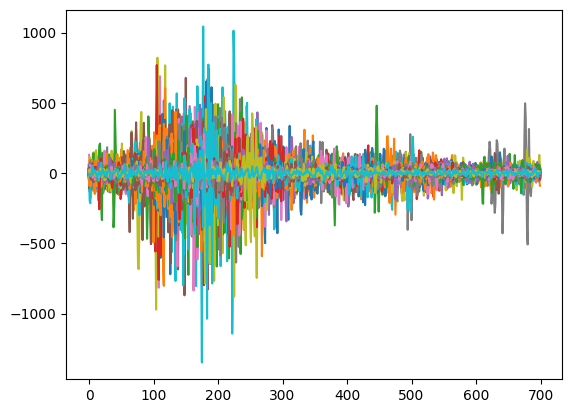

In [91]:
word_samples = df_curr[df_curr["Label_str"] == "backward"]

# display some sampled


Ch1 = word_samples["Ch_5_filt"]
for sample in range(len(Ch1)):
    plt.plot(Ch1.iloc[sample])



Found 15 .h5 files in: /baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_speech_classification_hmi/wins_and_feats/S04/vocalized/WIN_600
Found 15 .h5 files in: /baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_speech_classification_hmi/wins_and_feats/S04/vocalized/WIN_800
Found 15 .h5 files in: /baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_speech_classification_hmi/wins_and_feats/S04/vocalized/WIN_1000
Found 15 .h5 files in: /baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_speech_classification_hmi/wins_and_feats/S04/vocalized/WIN_1200
Found 15 .h5 files in: /baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_speech_classification_hmi/wins_and_feats/S04/vocalized/WIN_1400
Found 15 .h5 files in: /baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_speech_classification_hmi/wins_and_feats/S04/vocalized/WIN_1600
Found 15 .h5 files in: /baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_sp

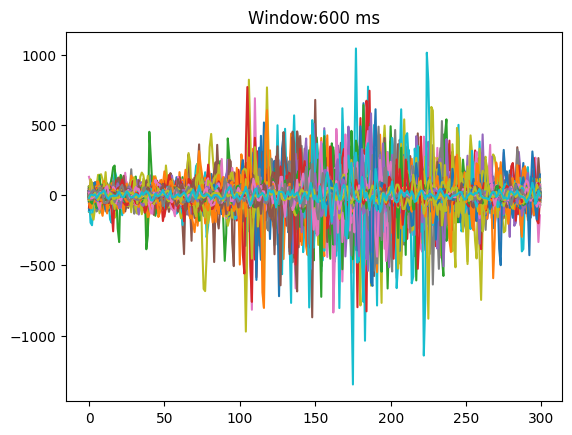

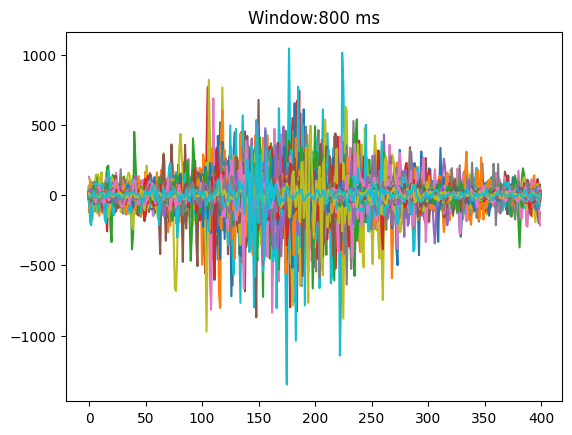

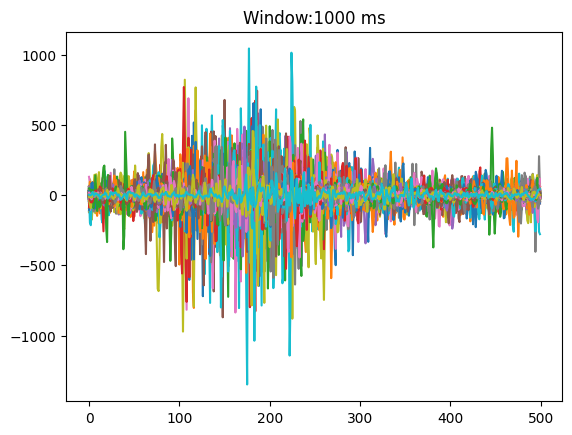

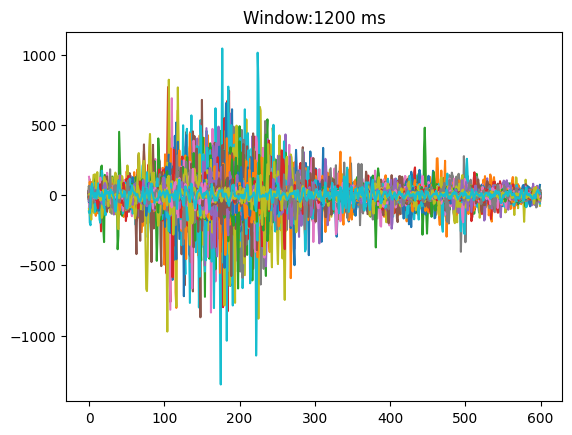

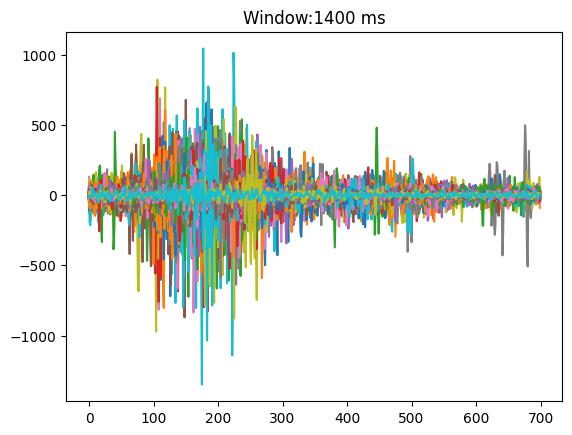

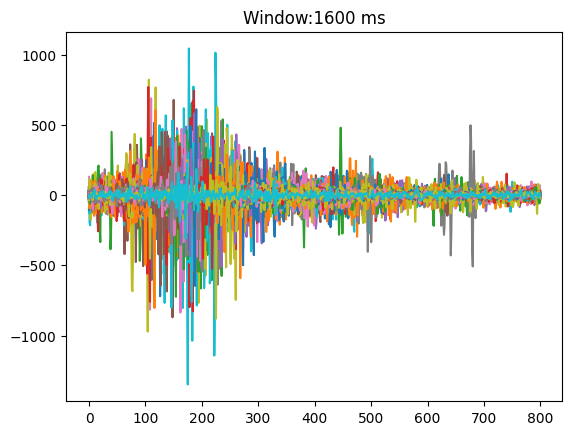

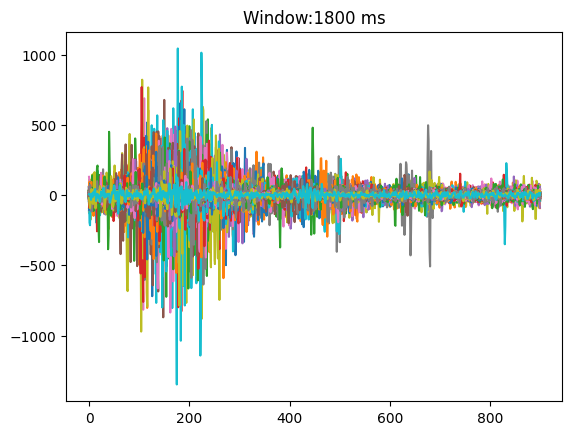

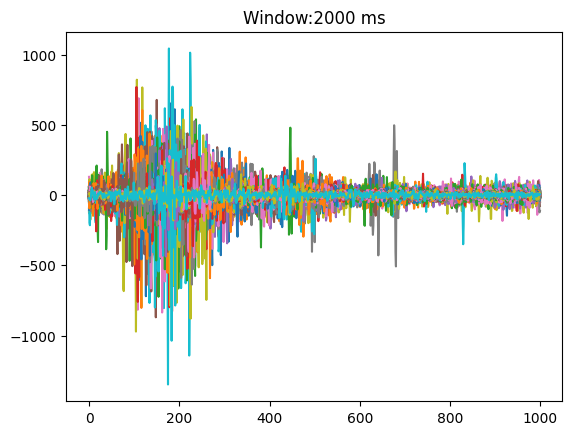

In [8]:
data_directory= Path("/baltic/users/ml_datasets/iis_bio_internal_datasets/2026_spacone_speech_classification_hmi/wins_and_feats")

sub_id = "S04"
condition = 'vocalized'

windows = [600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

for win in windows:
    data_directory_curr = Path(f"{data_directory}/{sub_id}/{condition}/WIN_{win}")

    df_curr = load_all_h5files_from_folder(data_directory_curr, key='wins_feats', print_statistics = False)
    word_samples = df_curr[df_curr["Label_str"] == "backward"]

    # display some sampled


    Ch1 = word_samples["Ch_5_filt"]
    plt.figure()
    for sample in range(len(Ch1)):
        plt.plot(Ch1.iloc[sample])
    plt.title(f"Window:{win} ms")


In [12]:

all_results = load_all_results(models_dire/"inter_session", subjects_to_consider = ["S01", "S02", "S03", "S04"], conditions_to_consider = ["silent","vocalized"])

In [15]:
all_results.iloc[1]["mean_cm"]

[[0.9504166666666668,
  0.014583333333333332,
  0.0008333333333333334,
  0.020416666666666666,
  0.009583333333333333,
  0.0025,
  0.0008333333333333334,
  0.0008333333333333334,
  0.0],
 [0.013333333333333334,
  0.5333333333333333,
  0.09000000000000001,
  0.05666666666666667,
  0.27999999999999997,
  0.006666666666666667,
  0.0033333333333333335,
  0.01,
  0.006666666666666667],
 [0.0,
  0.08666666666666667,
  0.42333333333333334,
  0.03333333333333333,
  0.33666666666666667,
  0.01,
  0.0,
  0.07666666666666667,
  0.03333333333333333],
 [0.006666666666666667,
  0.05333333333333334,
  0.03,
  0.6499999999999999,
  0.19333333333333336,
  0.0,
  0.05666666666666667,
  0.006666666666666667,
  0.0033333333333333335],
 [0.0,
  0.10999999999999999,
  0.06333333333333334,
  0.08333333333333333,
  0.6033333333333333,
  0.05333333333333334,
  0.02,
  0.043333333333333335,
  0.023333333333333334],
 [0.0033333333333333335,
  0.013333333333333334,
  0.013333333333333334,
  0.0,
  0.1366666666666

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
subjects = ["S01", "S02", "S03", "S04"]
conditions = ["vocalized", "silent"]

labels = list(ORIGINAL_LABELS.values())
n_subj = len(subjects)


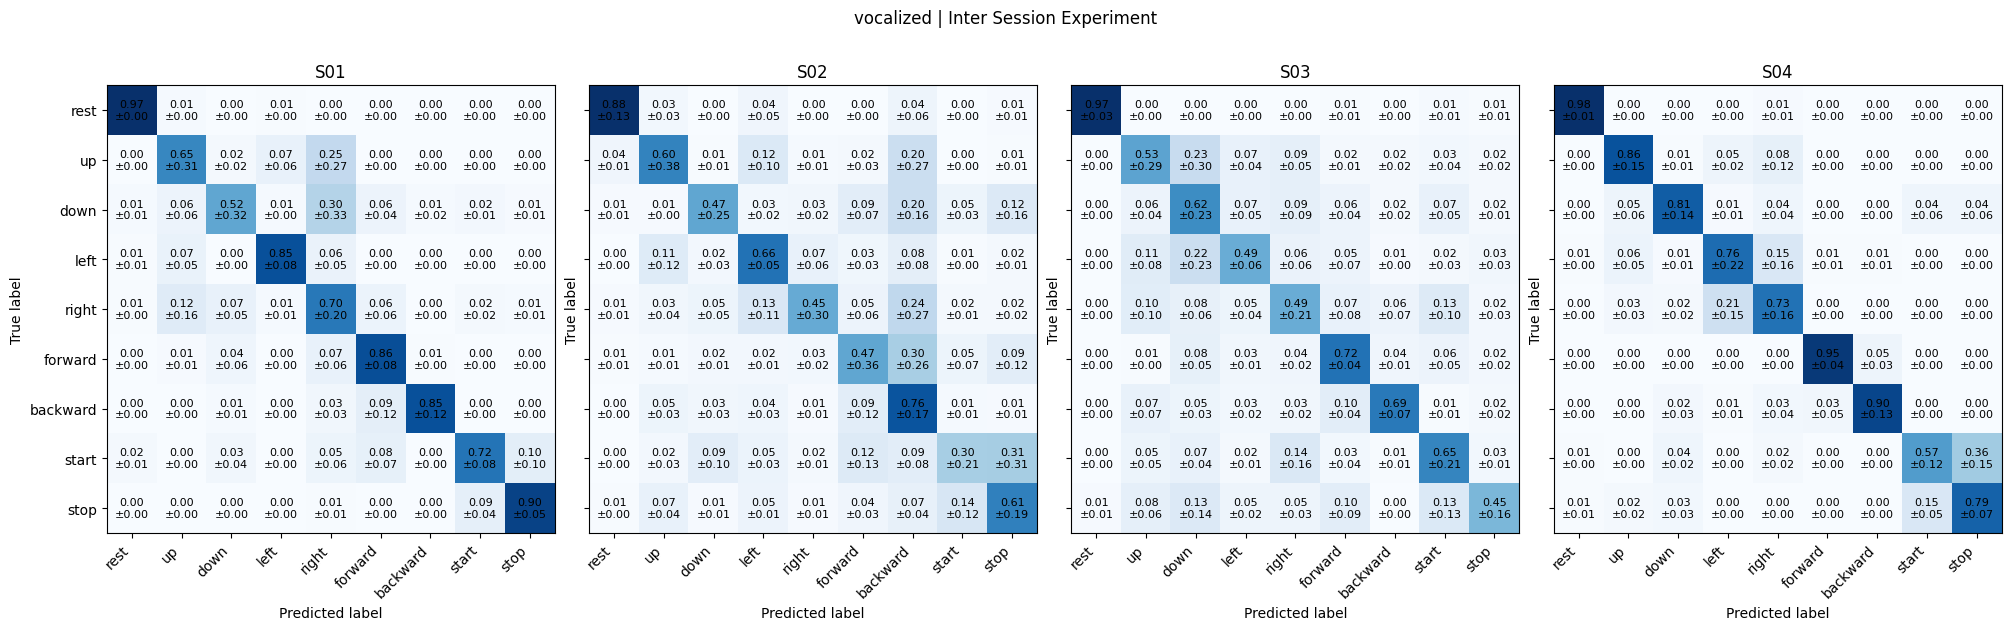

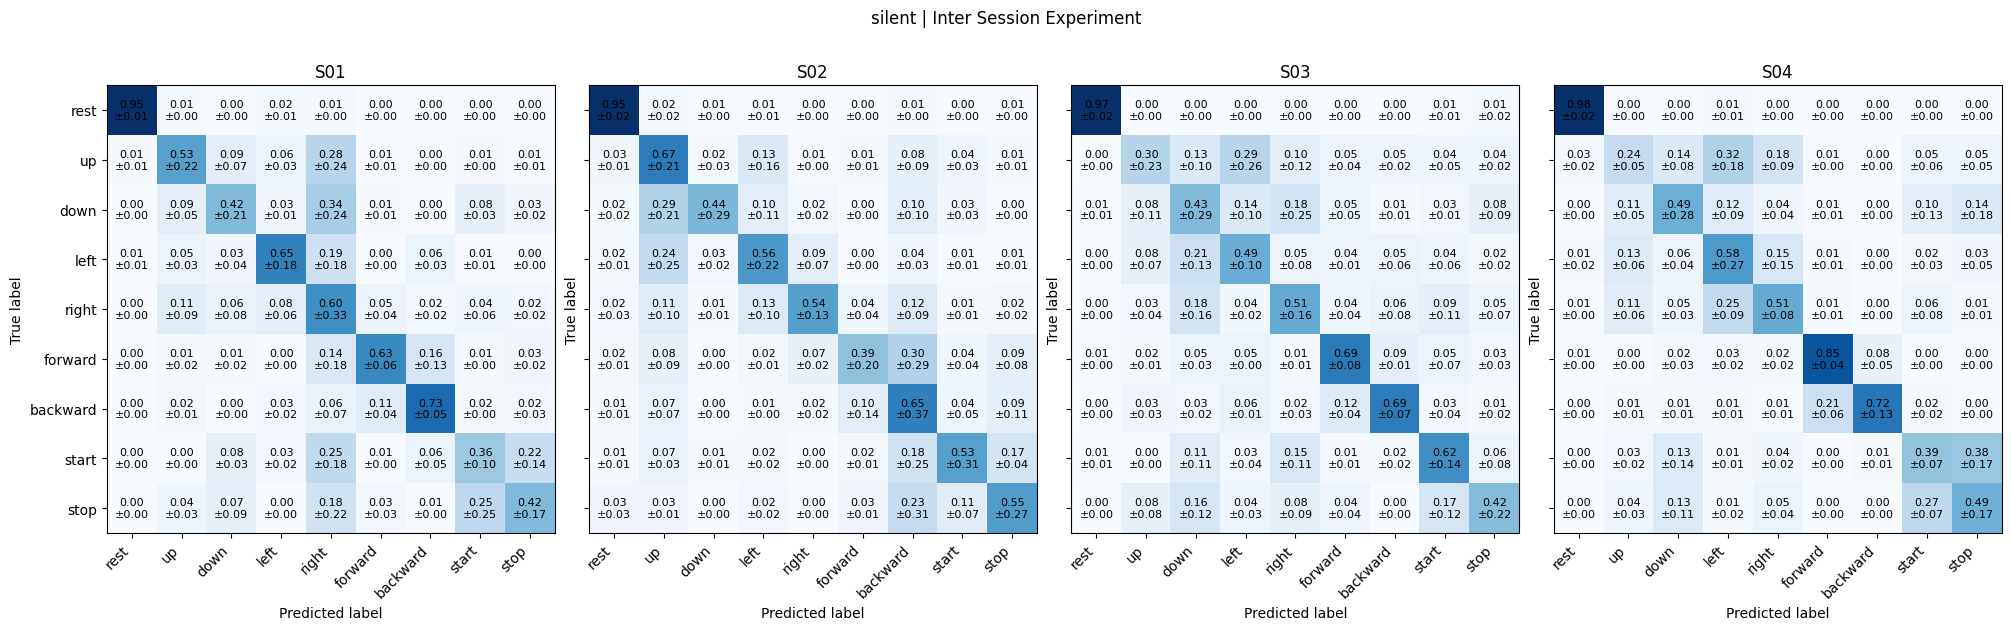

In [101]:

for condition in conditions:
    
    fig, axs = plt.subplots(1, n_subj, figsize=(20, 20), constrained_layout=True, sharey=True)
    axs = np.atleast_1d(axs)  # handles n_subj == 1

    for subject_id, subject in enumerate(subjects):
        df = pd.read_csv(f"/scratch2/gspacone/sensors_2026_final/models/inter_session/{subject}/{condition}/speechnet_base/model_1/cv_summary.csv")

        cm_mean, cm_std = mean_std_confusion_matrices(df["confusion_matrix"])

        ax = axs[subject_id]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=labels)

        # heatmap from mean (no default numbers)
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False, include_values=False)

        ax.set_title(subject)  # one title per subject
        ax.tick_params(axis="x", labelrotation=45)
        ax.set_xticklabels(ax.get_xticklabels(), ha="right")
        # annotate mean ± std
        for (i, j), m in np.ndenumerate(cm_mean):
            s = cm_std[i, j]
            ax.text(j, i, f"{m:.2f}\n±{s:.2f}", ha="center", va="center", fontsize=8)


    plt.suptitle(f"{condition} | Inter Session Experiment", y=0.65)
    plt.show()





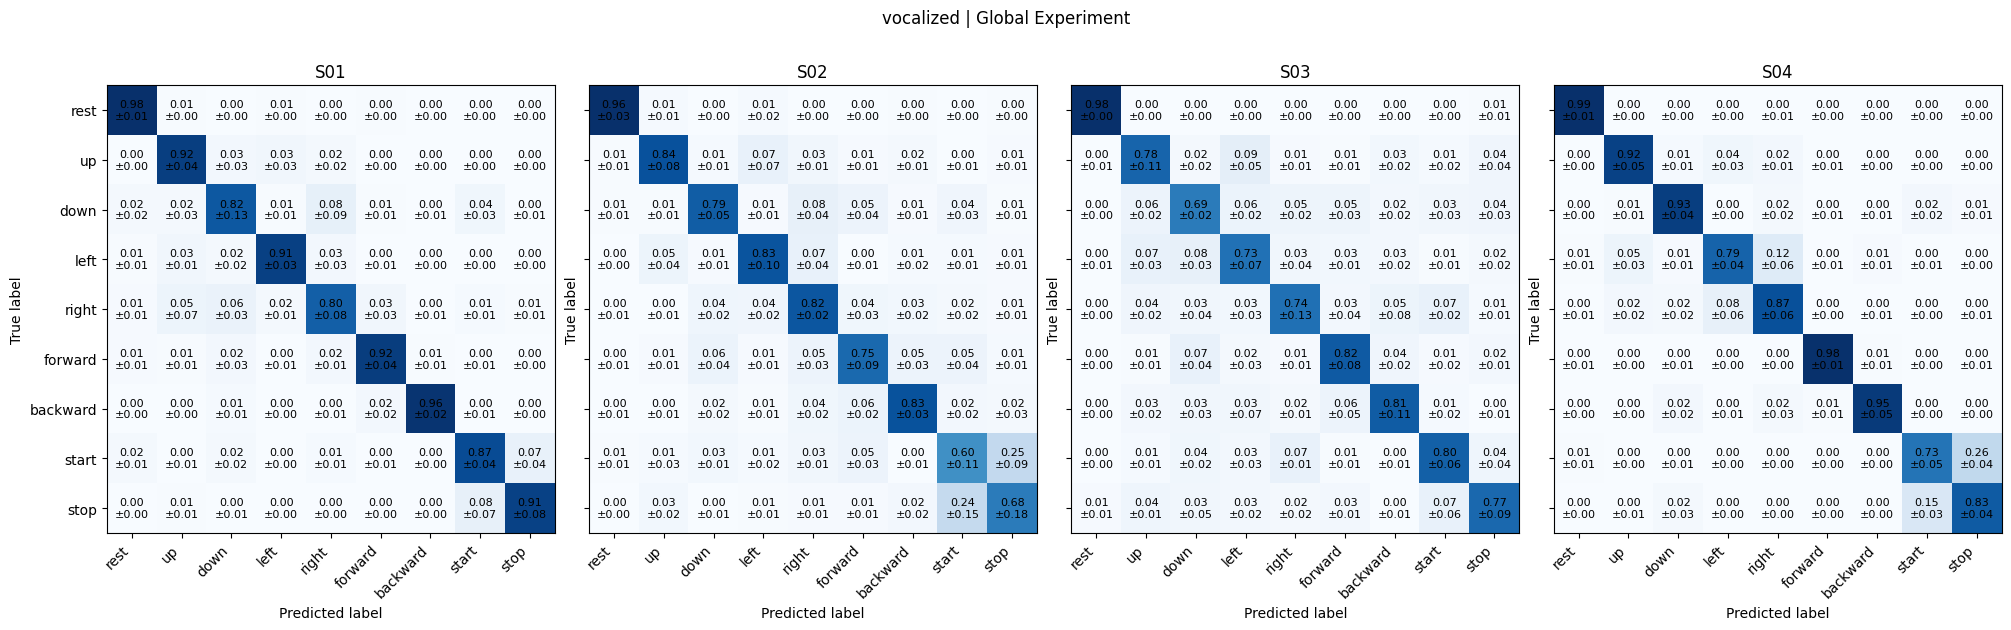

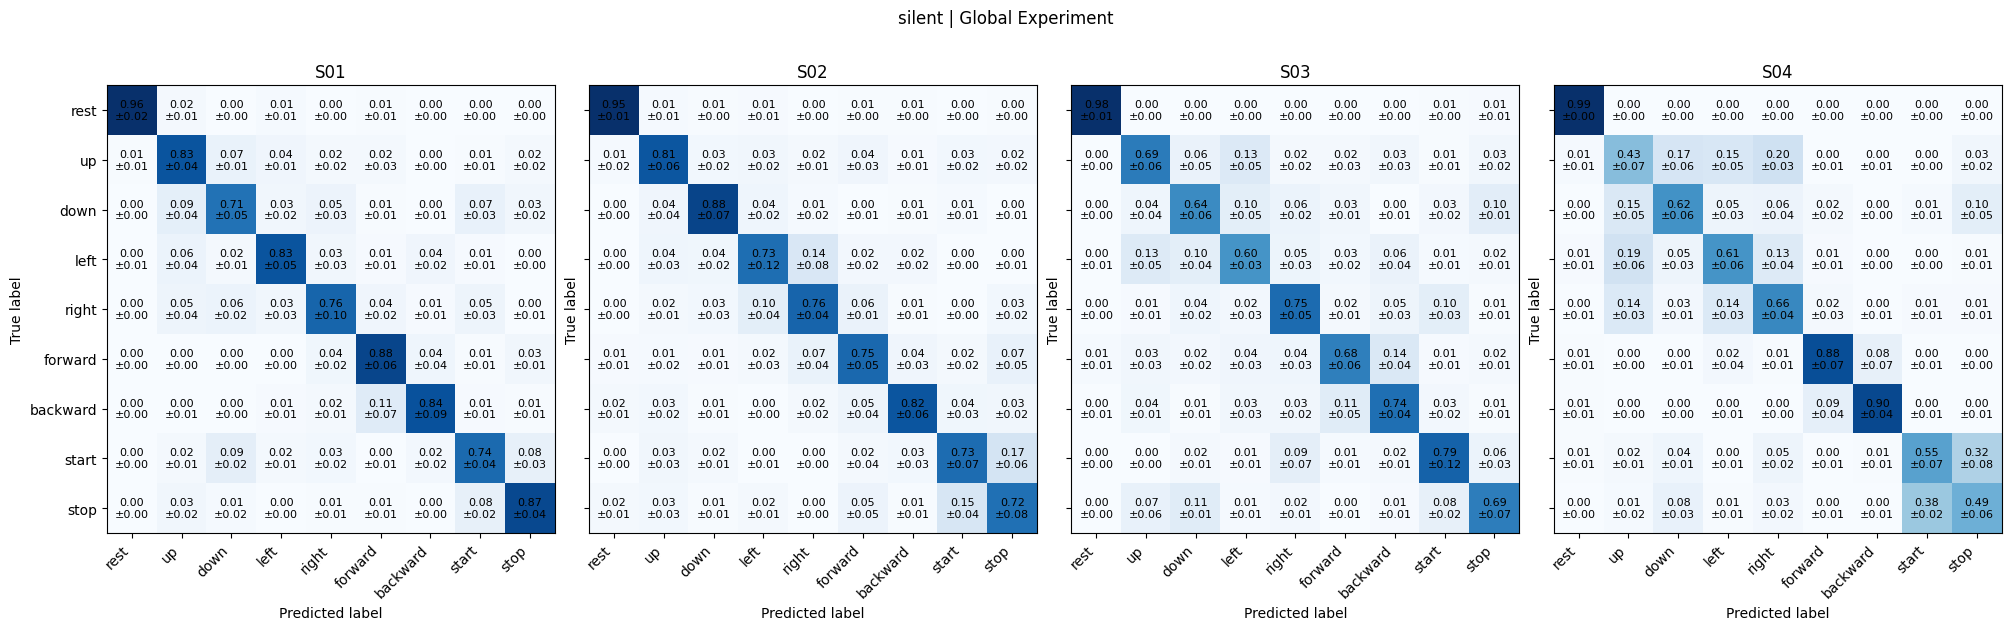

In [102]:
for condition in conditions:
    
    fig, axs = plt.subplots(1, n_subj, figsize=(20, 20), constrained_layout=True, sharey=True)
    axs = np.atleast_1d(axs)  # handles n_subj == 1

    for subject_id, subject in enumerate(subjects):
        df = pd.read_csv(f"/scratch2/gspacone/sensors_2026_final/models/global/{subject}/{condition}/speechnet_base/model_1/cv_summary.csv")

        cm_mean, cm_std = mean_std_confusion_matrices(df["confusion_matrix"])

        ax = axs[subject_id]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=labels)

        # heatmap from mean (no default numbers)
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False, include_values=False)

        ax.set_title(subject)  # one title per subject
        ax.tick_params(axis="x", labelrotation=45)
        ax.set_xticklabels(ax.get_xticklabels(), ha="right")
        # annotate mean ± std
        for (i, j), m in np.ndenumerate(cm_mean):
            s = cm_std[i, j]
            ax.text(j, i, f"{m:.2f}\n±{s:.2f}", ha="center", va="center", fontsize=8)


    plt.suptitle(f"{condition} | Global Experiment", y=0.65)
    plt.show()
